In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("3-2_TS_sample2.csv",index_col="年月日",encoding="shift_jis",parse_dates=True)

In [2]:
df["平均気温(℃)_差分"] = df["平均気温(℃)"].diff()
df["平均気温(℃)_変化率"] = df["平均気温(℃)"].pct_change()#.map("{:.1%}".format)
df["平均気温(℃)_ずらし"] = df["平均気温(℃)"].shift()
df["平均気温(℃)_移動平均"] = df["平均気温(℃)"].rolling(7,min_periods=1).mean()

df.head(10)

平均気温(℃)  降水量の合計(mm)  日照時間(時間)  平均気温(℃)_差分  平均気温(℃)_変化率  \
年月日                                                                  
2010-01-01      4.8         0.0       9.2         NaN          NaN   
2010-01-02      6.3         0.0       9.0         1.5     0.312500   
2010-01-03      5.7         0.0       6.6        -0.6    -0.095238   
2010-01-04      6.5         0.0       5.2         0.8     0.140351   
2010-01-05      7.3         2.5       8.1         0.8     0.123077   
2010-01-06      6.5         0.0       7.3        -0.8    -0.109589   
2010-01-07      7.3         0.0       8.1         0.8     0.123077   
2010-01-08      7.6         0.0       8.3         0.3     0.041096   
2010-01-09      7.2         0.0       9.0        -0.4    -0.052632   
2010-01-10      7.0         0.0       9.1        -0.2    -0.027778   

            平均気温(℃)_ずらし  平均気温(℃)_移動平均  
年月日                                    
2010-01-01          NaN      4.800000  
2010-01-02          4.8      5.550000  
2010-01-03          6.3      5.600000  
2010-01-04          5.7      5.825000  
2010-01-05          6.5      6.120000  
2010-01-06          7.3      6.183333  
2010-01-07          6.5      6.342857  
2010-01-08          7.3      6.742857  
2010-01-09          7.6      6.871429  
2010-01-10          7.2      7.057143

In [ ]:
#df["平均気温(℃)_欠損値補完"] = df["平均気温_仮"].fillna(method="bfill")
df["平均気温(℃)_欠損値補完"] = df["平均気温_仮"].interpolate()

df.head(10)

In [4]:
import statsmodels.api as sm

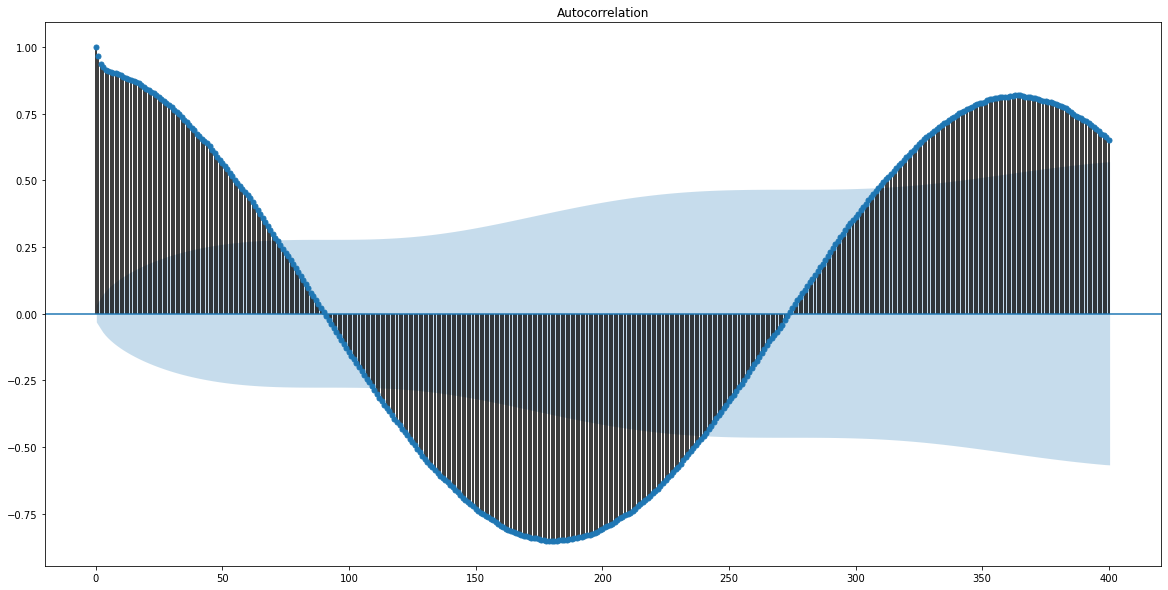

In [5]:
plt.rc("figure",figsize=(20,10))
res = sm.graphics.tsa.plot_acf(df["平均気温(℃)"],lags=400)

In [7]:
sm.tsa.stattools.acf(df["平均気温(℃)"],nlags=365)[365]

0.8187061682983768

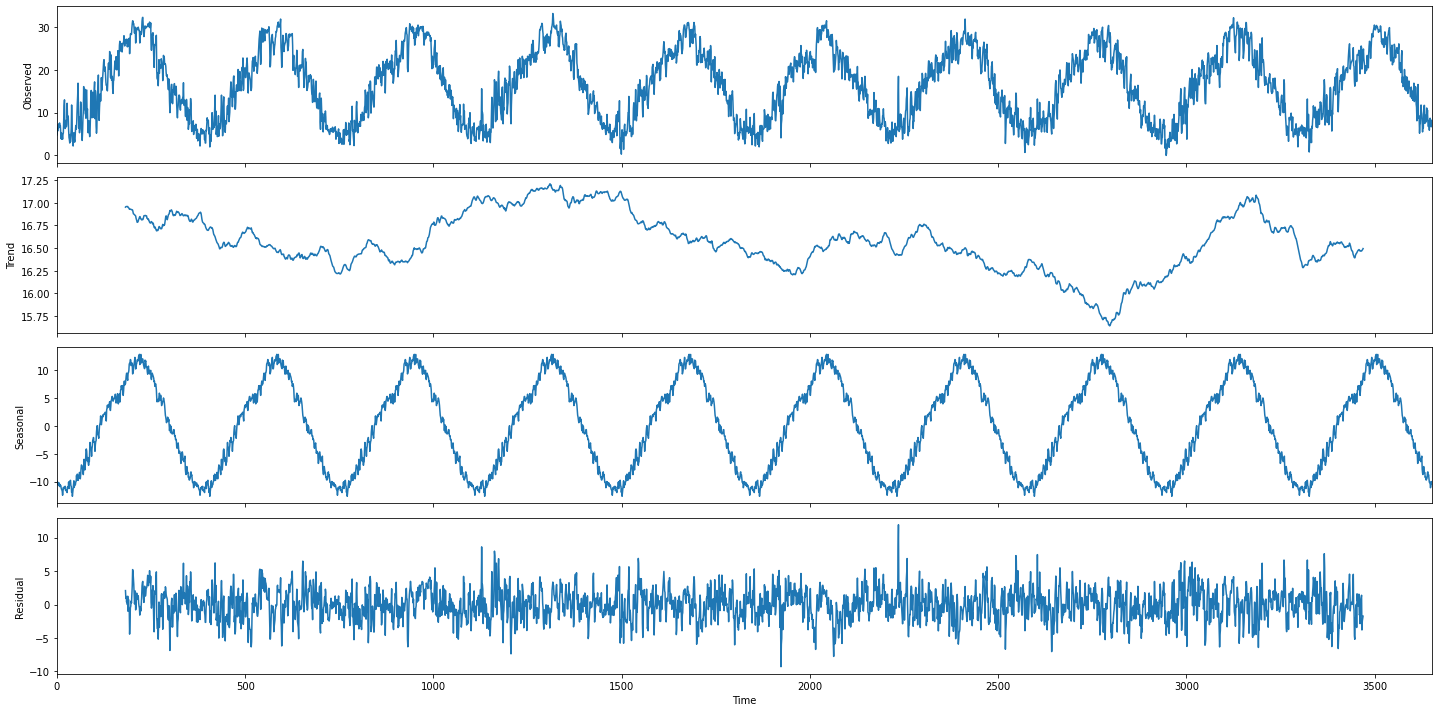

In [8]:
x = sm.tsa.seasonal_decompose(df["平均気温(℃)"].values,freq=365).plot()